In [197]:
import pandas as pd
import numpy as nd
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import davies_bouldin_score

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


In [198]:
df = pd.read_csv('./gym_churn_us.csv')

In [199]:
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [201]:
df.columns = df.columns.str.lower()

In [202]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Concusión:

- Cuando miramos el **promedio** de la **columna** de fuga ('churn') vemos que probablemente hay un desequilibrio de clases, es decir, vamos a tener una clase que va a tener muchos mas valores que el resto. 
Y eso suele ser un problema para los modelos de machine learning, por ende es algo que tenemos que revisar

---

In [203]:
conteo = df.churn.value_counts()

print(conteo)

churn
0    2939
1    1061
Name: count, dtype: int64


<BarContainer object of 2 artists>

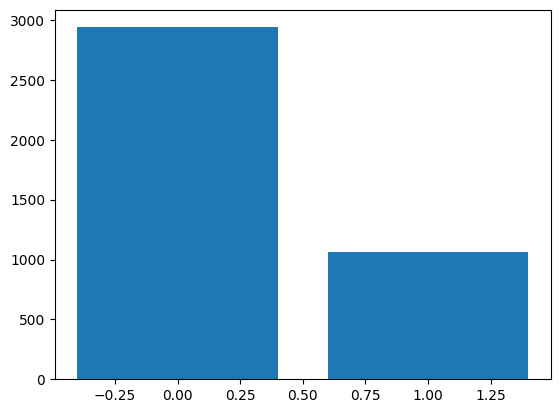

In [204]:
plt.bar(conteo.index, conteo.values)

### Conclusión:

- El objsetivo de mi interés es la gente que se fuga **"churn"**, pero tenemos muchos mas datos del lado contrario, y eso puede hacer que nuestro modelo de Machine Learnign falle, por eso debemos trabajar estos valores para que el model de ML los pondere de forma igual

---

### Observamos los valores medios de las características en dos grupos: 
para las personas que se fueron (cancelación) y para las que se quedaron

In [205]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


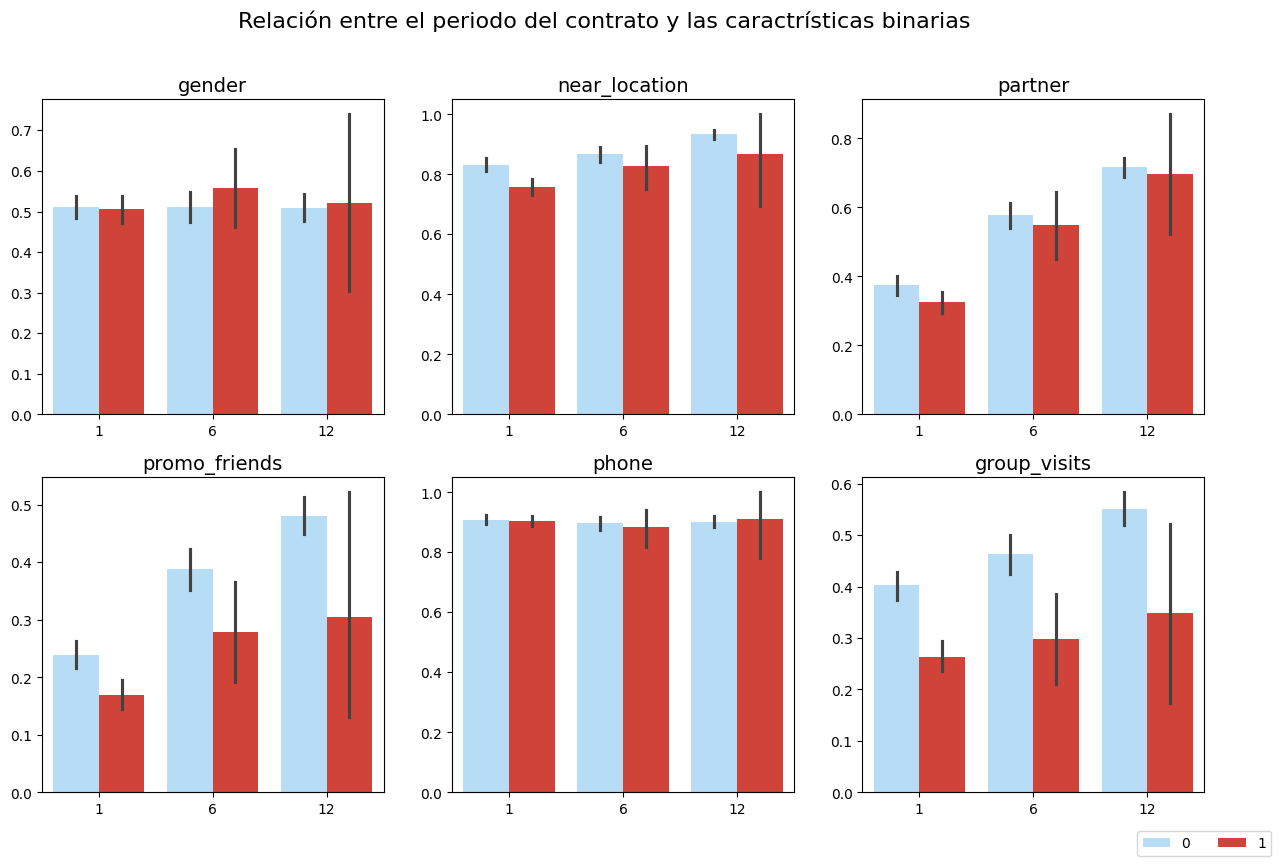

In [206]:
columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
cols = '#addeff', '#e82d1f'

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
for i, ax in enumerate(axs.flat):
    if i < len(columns):
        sns.barplot(x='contract_period', y=columns[i], data=df, hue='churn', palette=cols, ax=ax)
        ax.legend([], [], frameon=False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(f'{columns[i]}', fontsize=14)
    else:
        ax.axis('off')
        
plt.legend(loc='upper center', bbox_to_anchor=(1, -0.1), ncol=2, frameon=True)

fig.suptitle('Relación entre el periodo del contrato y las caractrísticas binarias', fontsize=16)
fig.subplots_adjust(top=0.88)
plt.show()



### Conclusión: 

- Podemos ver que principalmente en las columnas **"promo_friends"** y **"group_visits"** hay una diferencia significativa entre las personas que se quedan y la que se fugan respecto a los 3 diferentes tipos de contratos (1-6-12 meses), el resto de los valores están bien ponderados entre los 2 grupos de personas.

---

# histogramas de barras y distribuciones de características:
 para aquellas personas que se fueron y para las que se quedaron. (En las variables que no son binarias)

/var/folders/yd/jr1h18jn6px95w7s343fr20h0000gp/T/ipykernel_941/2878891273.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper center', bbox_to_anchor=(1, -0.1), ncol=2, frameon=True)


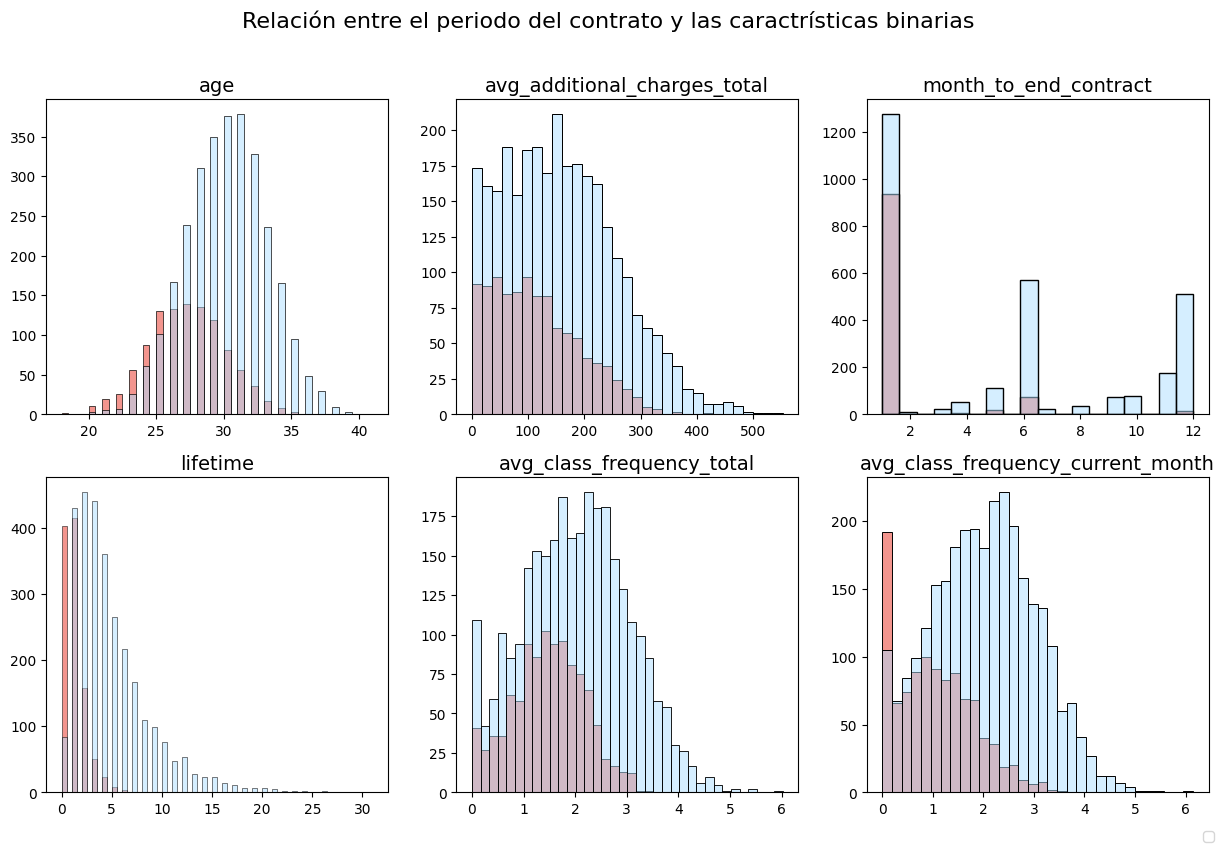

In [207]:
columns = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
cols = '#addeff', '#e82d1f'

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
for i, ax in enumerate(axs.flat):
    if i < len(columns):
        sns.histplot(x=columns[i], data=df, hue='churn', palette=cols, ax=ax)
        ax.legend([], [], frameon=False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(f'{columns[i]}', fontsize=14)
    else:
        ax.axis('off')
        
plt.legend(loc='upper center', bbox_to_anchor=(1, -0.1), ncol=2, frameon=True)

fig.suptitle('Relación entre el periodo del contrato y las caractrísticas binarias', fontsize=16)
fig.subplots_adjust(top=0.88)
plt.show()


### Conclusión:
- Podemos ver que en las columnas **"age"**, **"lifetime"** y **"avg_class_frequency_current_month"** son las que tienen mayor difernecia en la distribución

---

## Matriz de correlación:

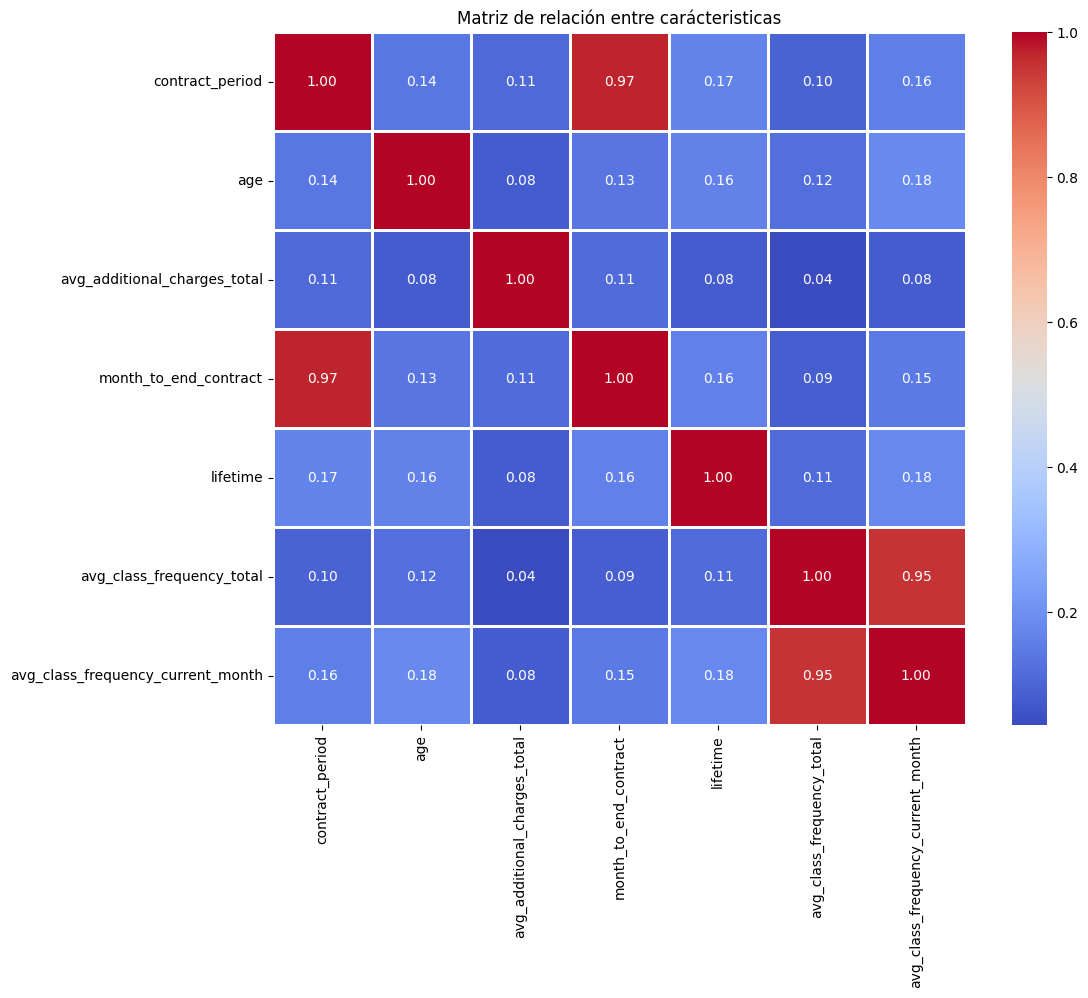

In [208]:
quant_cols = ['contract_period', 'age', 'avg_additional_charges_total',
            'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
            'avg_class_frequency_current_month']

gym_churn_quant = df[quant_cols]

cm = gym_churn_quant.corr()

plt.figure(figsize = (12,9))
plt.title('Matriz de relación entre carácteristicas')
sns.heatmap(cm, fmt= '.2f', annot=True, square=True, linewidths=1, linecolor='white', cmap="coolwarm")
plt.show(block=False)

### Conclusión:

- Las variables **"contract_period"** y **"month_to_end_contract"** tienen mucha relación, por ende que debemos quedarnos solo con una ya que puede generar problemas en nuestro modelo de ML.
- Lo mismo ocurre con las variables **"avg_class_frequency_total"** y **"avg_class_frequency_current_month"**, debemos eliminar una.

---

## Tablas cruzadas
- Generamos pequeñas tablas cruzadas que calculan las ponderaciones de la variable de interes que en este caso es  "churn" vs la otra variable "genre" y queda con el indice como una tabla cruzada

In [209]:
cat_cols = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']

cont_tables = []
for col in cat_cols:
    cont_table = pd.crosstab(index=df[col], columns=df['churn'], normalize='index')
    cont_tables.append(cont_table)

cont_tables

[churn          0         1
 gender                    
 0       0.735069  0.264931
 1       0.734444  0.265556,
 churn                 0         1
 near_location                    
 0              0.602585  0.397415
 1              0.758947  0.241053,
 churn           0         1
 partner                    
 0        0.666829  0.333171
 1        0.806369  0.193631,
 churn                 0         1
 promo_friends                    
 0              0.686913  0.313087
 1              0.841977  0.158023,
 churn         0         1
 phone                    
 0      0.733161  0.266839
 1      0.734920  0.265080,
 churn                0         1
 group_visits                    
 0             0.669928  0.330072
 1             0.827168  0.172832,
 churn    0    1
 churn          
 0      1.0  0.0
 1      0.0  1.0]

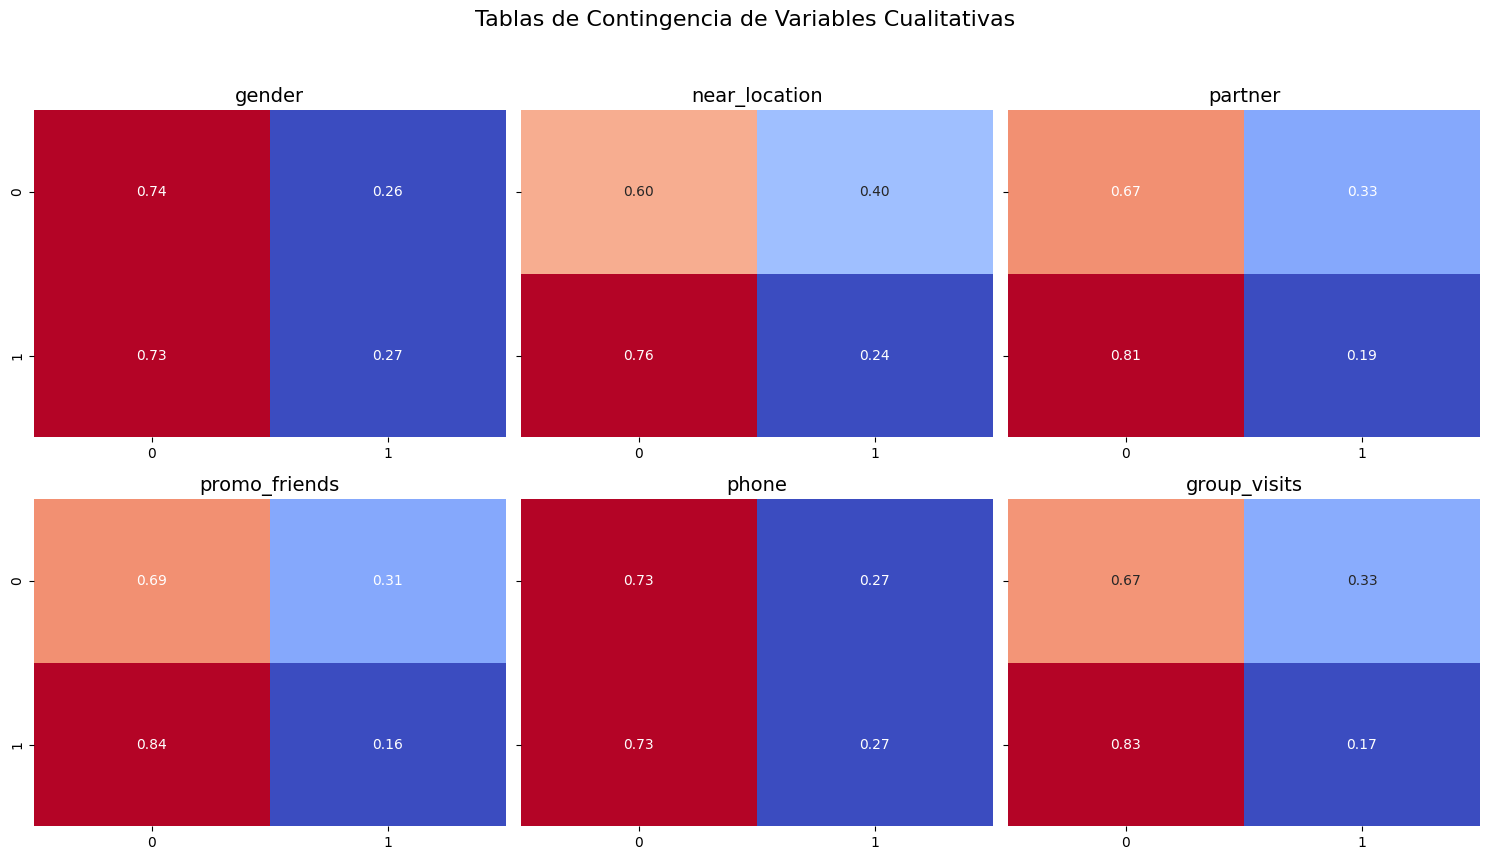

In [210]:

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 9), sharey=True)
fig.suptitle('Tablas de Contingencia de Variables Cualitativas', fontsize=16)

for i, ax in enumerate(axs.flat):
    if i < len(cont_tables):
        sns.heatmap(cont_tables[i], annot=True, fmt=".2f", cmap="coolwarm", cbar=False, ax=ax)
        ax.legend([], [], frameon=False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(f'{cat_cols[i]}', fontsize=14)
    else:
        ax.axis('off')
        

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Conclusión:

- Descartamos como variables útiles las columnas **"gender"** y **"phone"** dado que tienen distribuciones bastante similares en las 2 variables de interes. 

*con esto podríamos considerar que tenemos un análisis lo suficientemente robusto especializado en nuestro modelo de ML*

---

## Modelo de Machine Learning

### Construir un modelo para predecir la cancelación de usuarios

- Modelo de clasificación binaria para clientes donde la característica objetivo es la fuga del usuario el mes siguiente, comenzamos separando nuestros datos en las características que vamos a entregar para entrenar al modelo (y eliminando las variables que no necesitamos) y la variable objetivo.

In [211]:
x = df.drop(['churn', 'month_to_end_contract', 'avg_class_frequency_current_month', 'phone', 'gender'],  axis=1)
y = df['churn']

In [212]:
x

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total
0,1,1,1,6,1,29,14.227470,3,0.020398
1,1,0,0,12,1,31,113.202938,7,1.922936
2,1,1,0,1,0,28,129.448479,2,1.859098
3,1,1,1,12,1,33,62.669863,2,3.205633
4,1,1,1,1,0,26,198.362265,3,1.113884
...,...,...,...,...,...,...,...,...,...
3995,1,1,0,12,0,33,2.406023,8,2.284497
3996,1,0,0,1,1,29,68.883764,1,1.277168
3997,1,1,1,12,0,28,78.250542,2,2.786146
3998,1,1,1,6,0,32,61.912657,3,1.630108


In [213]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    1
3997    0
3998    0
3999    0
Name: churn, Length: 4000, dtype: int64

#### Entrenamos nuestro modelo de Machine Learning:

In [214]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [215]:
X_train

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total
1161,1,1,1,12,0,31,183.340029,8,3.590505
2355,1,0,0,1,0,30,40.559417,26,1.663034
1831,1,1,0,12,0,27,32.123604,5,1.060272
156,1,1,1,6,0,26,54.694211,9,2.531159
195,1,0,0,1,0,29,241.701674,4,1.690380
...,...,...,...,...,...,...,...,...,...
835,0,0,0,1,0,31,139.665457,3,2.104185
3264,1,1,1,12,1,34,232.148448,9,1.330589
1653,1,0,0,1,0,25,179.043886,3,1.128035
2607,1,0,0,1,1,28,7.614528,2,1.920819


In [216]:
Y_train

1161    0
2355    0
1831    0
156     0
195     0
       ..
835     0
3264    0
1653    0
2607    1
2732    0
Name: churn, Length: 3200, dtype: int64

### Conclusión:
- Podemos ver que nuestros datos de entrenamiento coinciden, lo mismo deberia ocurrir con los datos de prueba.
La idea es que al evaluar mi modelo lo haga con datos nuevos, no puedo usar data que utilicé para entrenar mi modelo porque no tendría sentido.
---

## Escalar variables numericas

- Debemos escalar nuestras variables numericas a variables categoricas (binarias) para que nuestro modelo de ML le pueda dar la misma ponderación, es muy importante hacerlo para modelos de regresión logistica.

In [217]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_test = scaler.transform(X_test)

In [218]:
X_train_data = pd.DataFrame(X_train)

X_train_data

,0,1,2,3,4,5,6,7,8
0,0.417507,1.031754,1.480010,1.605030,-0.847692,0.579448,0.371617,1.127350,1.755804
1,0.417507,-0.969223,-0.675671,-0.812991,-0.847692,0.270461,-1.096974,5.881383,-0.223967
2,0.417507,1.031754,-0.675671,1.605030,-0.847692,-0.656502,-1.183742,0.335011,-0.843085
3,0.417507,1.031754,1.480010,0.286110,-0.847692,-0.965489,-0.951588,1.391463,0.667714
4,0.417507,-0.969223,-0.675671,-0.812991,-0.847692,-0.038527,0.971904,0.070898,-0.195879
...,...,...,...,...,...,...,...,...,...
3195,-2.395171,-0.969223,-0.675671,-0.812991,-0.847692,0.579448,-0.077604,-0.193215,0.229154
3196,0.417507,1.031754,1.480010,1.605030,1.179673,1.506410,0.873643,1.391463,-0.565432
3197,0.417507,-0.969223,-0.675671,-0.812991,-0.847692,-1.274477,0.327429,-0.193215,-0.773483
3198,0.417507,-0.969223,-0.675671,-0.812991,1.179673,-0.347514,-1.435833,-0.457328,0.040813


### Entrenamos nuestro modelo:

In [219]:
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [220]:
pred_lr = model_lr.predict(X_test)
pred_prob_lr = model_lr.predict_proba(X_test)[:,1]

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [221]:
predicciones = pd.DataFrame({
    'y_real' : Y_test.values,
    'y_pred' : pred_lr
}, index= Y_test.index)

predicciones

,y_real,y_pred
2230,0,0
668,1,0
3616,0,0
2363,1,0
142,0,0
...,...,...
1118,1,0
3572,0,0
2482,0,0
643,0,0


In [222]:
pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [223]:
Y_test

2230    0
668     1
3616    0
2363    1
142     0
       ..
1118    1
3572    0
2482    0
643     0
299     0
Name: churn, Length: 800, dtype: int64

### Evaluar nuestros modelos:

In [224]:
accuracy_score(Y_test, pred_lr)

0.7525

In [225]:
precision_score(Y_test, pred_lr)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [226]:
recall_score(Y_test, pred_lr)

0.0

### Conclusión:

- El **accuracy_score** es alto, nos indica en cuantas predicciones lo hizo bien, **precision_score** y **recall_score** hacen referencias y ciertas ponderaciones sobre que tan bien lo hizo en base de los grupos, son diferentes formas de ponderar entre cuantos acertó de los que se fugaron y cuantos acertó de los que no se fugaron, entonces, no acertó ninguno en los que no se fugaron porque en ambas el resultado dio 0.0

---

### Bosque aleatorio:

In [227]:
model_rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=0)

In [228]:
pred_rf = model_rf.predict(X_test)
pred_prob_rf = model_rf.predict_proba(X_test)[:,1]

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [229]:
predicciones['pred_rf'] = pred_rf
predicciones

,y_real,y_pred,pred_rf
2230,0,0,0
668,1,0,0
3616,0,0,0
2363,1,0,0
142,0,0,0
...,...,...,...
1118,1,0,0
3572,0,0,0
2482,0,0,0
643,0,0,0


In [230]:
accuracy_score(Y_test, pred_rf)

0.7525

In [231]:
precision_score(Y_test, pred_rf)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [232]:
recall_score(Y_test, pred_rf)

0.0

## Cluster de Usuarios

In [233]:
df_cluster = df.drop('churn', axis=1)

In [234]:
scaler_cluster = StandardScaler()
X_cluster = scaler_cluster.fit_transform(df_cluster)

**Matríz de distancia:**
- Separa nuestros datos y los agrupa depende de sus similitudes para asi agruparlos y poder crear los clusters.

In [235]:
distance_matrix = pdist(X_cluster)

In [236]:
linkage_matrix = linkage(distance_matrix, method = 'ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [51.25, 51.25, 92.5, 92.5],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [120.0, 120.0, 142.5, 142.5],
  [71.875, 71.875, 131.25, 131.25],
  [12.5, 12.5, 101.5625, 101.5625],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [202.5, 202.5, 233.75, 233.75],
  [172.5, 172.5, 218.125, 218.125],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [270.0, 270.0, 293.75, 293.75],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [365.0, 365.

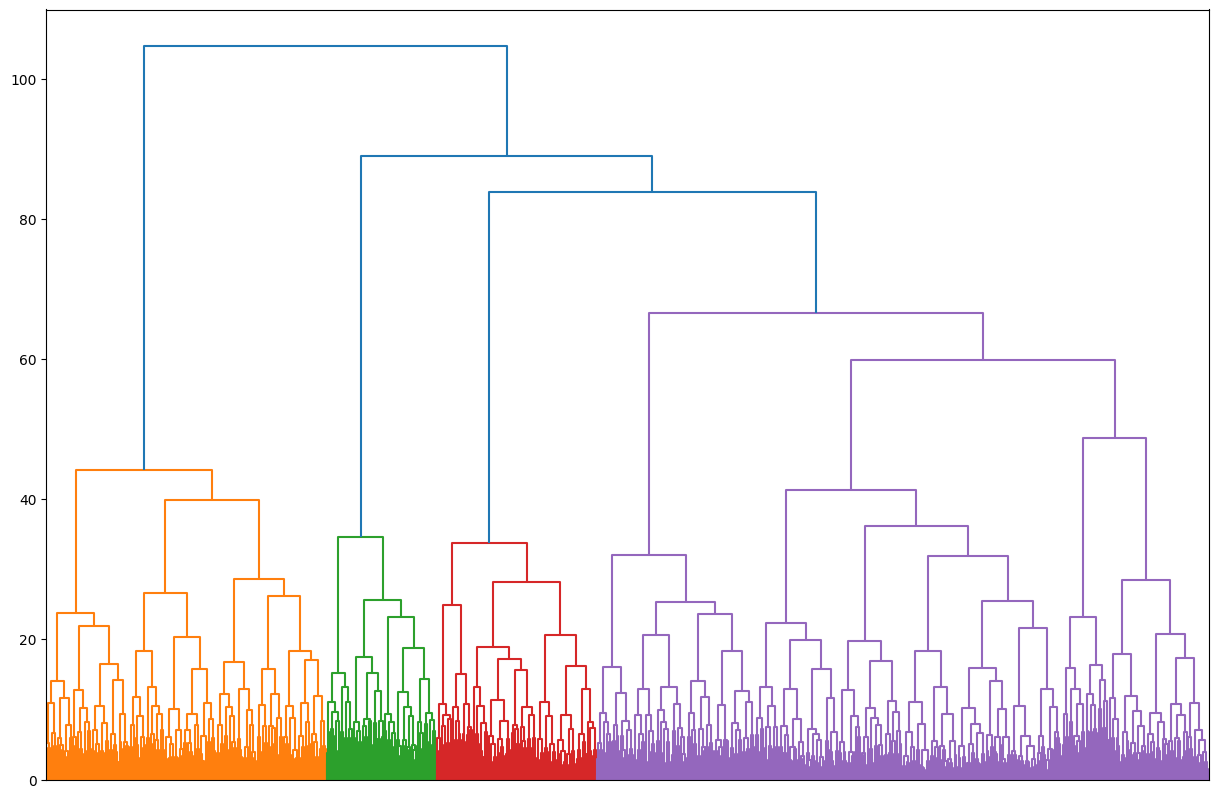

In [237]:
plt.figure(figsize = (15, 10))
dendrogram(linkage_matrix, orientation='top', no_labels=True)

### Conclusión:
- Un dendograma te dice como se van relacioando los datos entre si con respecto a su distancia, este nos indica que tenemos alrededor de 4 clusters (grupos) en nuestros datos.

---

In [238]:
km4 = KMeans(n_clusters= 4, random_state= 0)
km4.fit(X_cluster)

KMeans(n_clusters=4, random_state=0)

In [239]:
km4.labels_

array([3, 2, 3, ..., 2, 3, 2], shape=(4000,), dtype=int32)

In [240]:
davies_bouldin_score(X_cluster, km4.labels_)

np.float64(2.350788785259778)

In [241]:
km5 = KMeans(n_clusters= 4, random_state= 0)
km5.fit(X_cluster)

KMeans(n_clusters=4, random_state=0)

In [242]:
davies_bouldin_score(X_cluster, km5.labels_)

np.float64(2.350788785259778)

In [243]:
df['cluster_labels'] = km5.labels_
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_labels
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,3
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,2
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


In [244]:
df.groupby('cluster_labels').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_labels,,,,,,,,,,,,,,
0,0.475868,0.806097,0.000000,0.082981,0.902625,1.828112,0.316681,28.196444,130.388619,1.755292,2.354784,1.340588,1.101768,0.547841
1,0.557018,0.875000,0.327851,0.210526,0.910088,2.794956,0.459430,30.226974,163.805504,2.588816,5.121711,2.924226,2.933171,0.044956
2,0.505314,0.941063,0.749758,0.536232,0.901449,11.373913,0.563285,29.960386,166.096558,10.414493,4.800966,2.000424,1.992218,0.023188
3,0.513761,0.753440,1.000000,0.446101,0.900229,2.574541,0.313073,28.510321,128.997012,2.383028,2.841743,1.371000,1.181216,0.400229


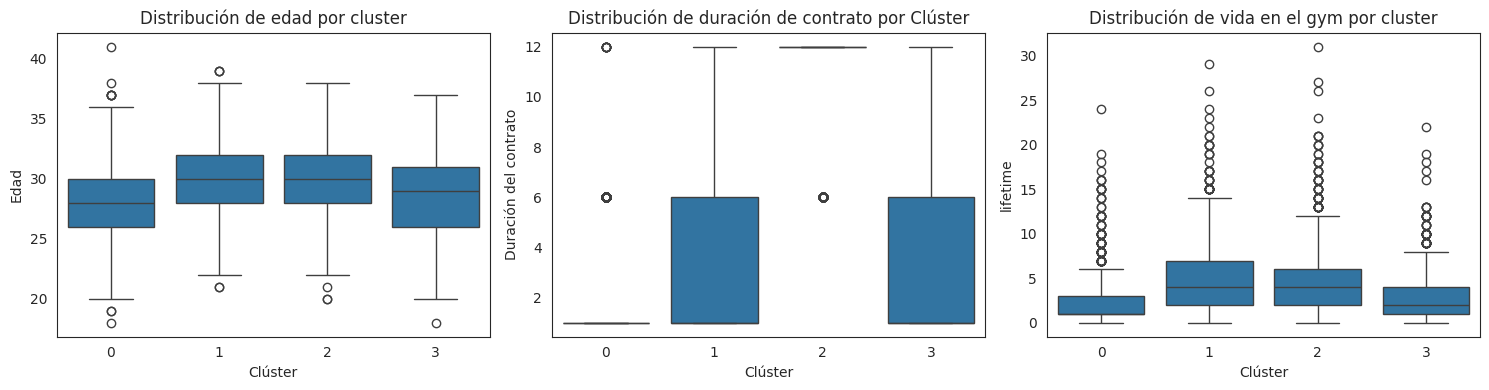

In [245]:
f = plt.figure(figsize=(15, 4))
gs = f.add_gridspec(1, 3)

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(x='cluster_labels', y='age', data=df)
    plt.title('Distribución de edad por cluster')
    plt.xlabel('Clúster')
    plt.ylabel('Edad')

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sns.boxplot(x='cluster_labels', y='contract_period', data=df)
    plt.title('Distribución de duración de contrato por Clúster')
    plt.xlabel('Clúster')
    plt.ylabel('Duración del contrato')

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 2])
    sns.boxplot(x='cluster_labels', y='lifetime', data=df)
    plt.title('Distribución de vida en el gym por cluster')
    plt.xlabel('Clúster')
    plt.ylabel('lifetime')

f.tight_layout()

### Conclusión:
1. Distribución de edad por clúster:
- Clústeres con mayor mediana de edad probablemente representan usuarios más maduros.
- Si un clúster tiene una mediana de edad baja y un lifetime también bajo, podría representar jóvenes que abandonan rápido.
- Algunos usuarios inusuales (por ejemplo, muy jóvenes o muy mayores).

 2. Duración del contrato por clúster:
- Si un clúster tiene contratos más largos, puede indicar usuarios más comprometidos o con más fidelidad.
- Contratos cortos en un clúster pueden relacionarse con alta tasa de churn.

 3. Lifetime en el gimnasio:
- El lifetime es clave: si un clúster tiene bajo lifetime y bajo contract_period, probablemente sean usuarios fugaces.
- Un clúster con lifetime alto y contratos largos puede ser el grupo más leal.

---

In [246]:
df.groupby('cluster_labels')['churn'].mean()

cluster_labels
0    0.547841
1    0.044956
2    0.023188
3    0.400229
Name: churn, dtype: float64

### Conclusión:

- 0: **54.8%**	 Grupo con más riesgo de abandono. Más de la mitad se va. Este clúster debe ser estudiado y tratado con estrategias de retención.
- 1:	**4.5%**	 Grupo muy leal. Casi nadie cancela. Ideal para fidelización y como referencia para otros grupos.
- 2:	**2.3%**	 El grupo más leal. Altísima retención. Podrías estudiarlo para entender qué hábitos, edades o contratos tienen.
- 3:	**40.0%**	 Grupo con riesgo medio-alto. Aunque no tan grave como el clúster 0, también merece atención.

---

### **Conclusión Final del Proyecto - Predicción de Cancelación en Gimnasio**

Este proyecto tuvo como objetivo principal analizar el comportamiento de los clientes de un gimnasio para **predecir la cancelación del servicio (churn)** mediante técnicas de Machine Learning y segmentación de usuarios. A continuación, se resumen los hallazgos y logros clave:

---

### **1. Análisis exploratorio y preparación de datos**
- Se identificó un **importante desbalance de clases**: solo un pequeño porcentaje de usuarios había cancelado, lo que motivó un cuidado especial en la selección de métricas y en la evaluación de modelos.
- Las variables como la **edad**, el **período de contrato** y el **tiempo total en el gimnasio (`lifetime`)** resultaron especialmente relevantes para explicar el comportamiento de los clientes.

---

### **2. Modelado predictivo**
- Se probaron múltiples algoritmos de clasificación como **Random Forest**, **Decision Tree** y **K-Nearest Neighbors**, evaluando su rendimiento en términos de precisión y otras métricas.
- Se identificó la necesidad de usar métricas más robustas que la precisión simple (accuracy), como **F1-score** o **matriz de confusión**, debido al desbalance de clases.
- El modelo más eficiente debe ser seleccionado considerando tanto rendimiento como interpretabilidad.

---

### **3. Segmentación de clientes (Clustering)**
- Se aplicó **clustering no supervisado** para agrupar clientes en 4 segmentos distintos.
- El análisis reveló diferencias claras en las tasas de cancelación entre los clústeres:
  - **Clúster 0:** 54.8% de cancelación → grupo en **alto riesgo** de abandono.
  - **Clúster 3:** 40.0% de cancelación → grupo con **riesgo moderado**.
  - **Clústeres 1 y 2:** menos del 5% de cancelación → grupos altamente **leales**.

Esta segmentación permite diseñar estrategias específicas para cada grupo, como programas de fidelización, promociones personalizadas o intervenciones tempranas.

---

### **Conclusión general**
Este proyecto proporciona una **base sólida para la toma de decisiones estratégicas** en el gimnasio. A través del uso de Machine Learning y análisis de datos:

- Se identificaron los perfiles de usuarios más propensos a cancelar.
- Se establecieron segmentos de comportamiento claros.
- Se abrió la puerta a estrategias de retención más efectivas y basadas en datos.
